In [1]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=16821c239628df77e702e6b64cfd36294f3d0f584c03a3440996a4853dcc4884
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [2]:
import pandas as pd
import nltk
import re
from nltk.stem import WordNetLemmatizer 
import emoji
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
data=pd.read_parquet('/content/drive/MyDrive/6195/2021-04')

In [4]:
data

,id,tweet_id,headline,translated_headline,date,link,timestamp,link_hash,is_starred_by_the_tie,metadata,tags,sources,starred_by_the_tie_user
0,214440,1.377410e+18,ブログ更新：#Cardano ブロック生成はまもなく完全に分散化され、ブロックは100%ステ...,None,2021-04-01 00:00:12+00:00,https://twitter.com/InputOutputHK/status/13774...,2021-04-01 00:01:04+00:00,e24fac2fe6debd24a4b60787be44965f,False,None,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...","[{'collections': [{'id': 47, 'name': 'Crypto P...",None
1,214442,1.377411e+18,RT @beniaminmincu: Simplest way to stake. Period.,None,2021-04-01 00:01:34+00:00,https://twitter.com/ElrondNetwork/status/13774...,2021-04-01 00:02:02+00:00,3cc840e578a77b69360da53fe8153890,False,None,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...","[{'collections': [{'id': 47, 'name': 'Crypto P...",None
2,214441,1.377410e+18,Qtum partners with Vaccine Forward to help sup...,None,2021-04-01 00:00:15+00:00,https://twitter.com/qtum/status/13774104453514...,2021-04-01 00:02:05+00:00,4eb8e5b5db96ee3efbffd75acb4c9eac,False,None,"[{'coin': None, 'id': 311, 'name': 'Partnershi...","[{'collections': [{'id': 47, 'name': 'Crypto P...",None
3,214443,1.377411e+18,🏁 THE RALLY TOKEN SALE &amp; DISTRIBUTION ON C...,None,2021-04-01 00:00:00+00:00,https://twitter.com/CoinList/status/1377410883...,2021-04-01 00:03:04+00:00,9b2ddec4690d9166f387e81d7c1f23fa,False,None,"[{'coin': None, 'id': 371, 'name': 'CoinList',...","[{'collections': [{'id': 43, 'name': 'Exchange...",None
4,454236,1.377410e+18,ブログ更新：#Cardano ブロック生成はまもなく完全に分散化され、ブロックは100%ステ...,None,2021-04-01 00:00:00+00:00,https://twitter.com/i/web/status/1377410431959...,2021-04-01 00:07:41.342000+00:00,241cd329c5f96a5b5b5bbe80f96a98bd,False,None,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...","[{'collections': [{'id': 47, 'name': 'Crypto P...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42722,246254,1.388275e+18,RT @Coinight: 🌟 Zilliqa Has Announced a New St...,None,2021-04-30 23:31:16+00:00,https://twitter.com/zilliqa/status/13882747857...,2021-04-30 23:32:02+00:00,c431a1af83c4f198bcf1f13270260734,False,None,"[{'coin': None, 'id': 187, 'name': 'Announceme...","[{'collections': [{'id': 47, 'name': 'Crypto P...",None
42723,246255,NaN,Ethereum Moves Toward ETH 2.0 With ‘Super Expe...,None,2021-04-30 00:00:00+00:00,https://www.decrypt.co/69635/ethereum-moves-to...,2021-04-30 23:33:09+00:00,7b02424e6c9777a89fd388639c6113a4,False,None,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...","[{'collections': [{'id': 5, 'name': 'Crypto Na...",None
42724,246256,1.388276e+18,RT @WPeaster: 18th @BanklessHQ here! A week fo...,None,2021-04-30 23:36:16+00:00,https://twitter.com/AxieInfinity/status/138827...,2021-04-30 23:38:03+00:00,6aa43989649c108c0af738821b68a419,False,None,"[{'coin': None, 'id': 187, 'name': 'Announceme...","[{'collections': [{'id': 47, 'name': 'Crypto P...",None
42725,246257,1.388277e+18,Great to have you @AtmPools @4TheWhiteRabbit a...,None,2021-04-30 23:41:13+00:00,https://twitter.com/InputOutputHK/status/13882...,2021-04-30 23:42:05+00:00,008fcba7e05eea8a44c6d4012e182db1,False,None,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...","[{'collections': [{'id': 47, 'name': 'Crypto P...",None


In [5]:
data=data[['id','date','headline', 'timestamp', 'tags']]

In [6]:
data['hashtag'] = data['headline'].apply(lambda x: re.findall(r"#(\w+)", x))
data['hashtag']

<ipython-input-6-57e215a67ce5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hashtag'] = data['headline'].apply(lambda x: re.findall(r"#(\w+)", x))


0              [Cardano, decentralization]
1                                       []
2                      [Covid_19, vaccine]
3                                       []
4                                [Cardano]
                       ...                
42722                                   []
42723                                   []
42724                                   []
42725    [Plutus, Haskell, smartcontracts]
42726                                   []
Name: hashtag, Length: 42727, dtype: object

In [7]:
#@title Emodji

In [8]:
for i in range(len(data['headline'])):
  data['headline'][i]=(emoji.demojize( data['headline'][i]))

<ipython-input-8-aeddc8ee2f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['headline'][i]=(emoji.demojize( data['headline'][i]))


In [9]:
data.headline[6369]

'.@AntoniNexo will once again be live on @BloombergTV tomorrow to discuss the latest #crypto events with @annmarie and @ManusCranny, discussing the latest events in #crypto.\n\nTune in on April 7 at 06:40 BST. https://t.co/uoH6ILz4tB'

In [10]:
data['len_tags'] = data.tags.apply(lambda x: len(x))
data['len_tags']

<ipython-input-10-66727e47e075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['len_tags'] = data.tags.apply(lambda x: len(x))


0        1
1        2
2        2
3        1
4        1
        ..
42722    4
42723    1
42724    3
42725    2
42726    4
Name: len_tags, Length: 42727, dtype: int64

In [11]:
data = data[data.len_tags != 0]
data

,id,date,headline,timestamp,tags,hashtag,len_tags
0,214440,2021-04-01 00:00:12+00:00,ブログ更新：#Cardano ブロック生成はまもなく完全に分散化され、ブロックは100%ステ...,2021-04-01 00:01:04+00:00,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...","[Cardano, decentralization]",1
1,214442,2021-04-01 00:01:34+00:00,RT @beniaminmincu: Simplest way to stake. Period.,2021-04-01 00:02:02+00:00,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",[],2
2,214441,2021-04-01 00:00:15+00:00,Qtum partners with Vaccine Forward to help sup...,2021-04-01 00:02:05+00:00,"[{'coin': None, 'id': 311, 'name': 'Partnershi...","[Covid_19, vaccine]",2
3,214443,2021-04-01 00:00:00+00:00,:chequered_flag: THE RALLY TOKEN SALE &amp; DI...,2021-04-01 00:03:04+00:00,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",[],1
4,454236,2021-04-01 00:00:00+00:00,ブログ更新：#Cardano ブロック生成はまもなく完全に分散化され、ブロックは100%ステ...,2021-04-01 00:07:41.342000+00:00,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...",[Cardano],1
...,...,...,...,...,...,...,...
42722,246254,2021-04-30 23:31:16+00:00,RT @Coinight: :glowing_star: Zilliqa Has Annou...,2021-04-30 23:32:02+00:00,"[{'coin': None, 'id': 187, 'name': 'Announceme...",[],4
42723,246255,2021-04-30 00:00:00+00:00,Ethereum Moves Toward ETH 2.0 With ‘Super Expe...,2021-04-30 23:33:09+00:00,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",[],1
42724,246256,2021-04-30 23:36:16+00:00,RT @WPeaster: 18th @BanklessHQ here! A week fo...,2021-04-30 23:38:03+00:00,"[{'coin': None, 'id': 187, 'name': 'Announceme...",[],3
42725,246257,2021-04-30 23:41:13+00:00,Great to have you @AtmPools @4TheWhiteRabbit a...,2021-04-30 23:42:05+00:00,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...","[Plutus, Haskell, smartcontracts]",2


In [12]:
len(data)

41663

In [13]:
data.reset_index(drop=True)

,id,date,headline,timestamp,tags,hashtag,len_tags
0,214440,2021-04-01 00:00:12+00:00,ブログ更新：#Cardano ブロック生成はまもなく完全に分散化され、ブロックは100%ステ...,2021-04-01 00:01:04+00:00,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...","[Cardano, decentralization]",1
1,214442,2021-04-01 00:01:34+00:00,RT @beniaminmincu: Simplest way to stake. Period.,2021-04-01 00:02:02+00:00,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",[],2
2,214441,2021-04-01 00:00:15+00:00,Qtum partners with Vaccine Forward to help sup...,2021-04-01 00:02:05+00:00,"[{'coin': None, 'id': 311, 'name': 'Partnershi...","[Covid_19, vaccine]",2
3,214443,2021-04-01 00:00:00+00:00,:chequered_flag: THE RALLY TOKEN SALE &amp; DI...,2021-04-01 00:03:04+00:00,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",[],1
4,454236,2021-04-01 00:00:00+00:00,ブログ更新：#Cardano ブロック生成はまもなく完全に分散化され、ブロックは100%ステ...,2021-04-01 00:07:41.342000+00:00,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...",[Cardano],1
...,...,...,...,...,...,...,...
41658,246254,2021-04-30 23:31:16+00:00,RT @Coinight: :glowing_star: Zilliqa Has Annou...,2021-04-30 23:32:02+00:00,"[{'coin': None, 'id': 187, 'name': 'Announceme...",[],4
41659,246255,2021-04-30 00:00:00+00:00,Ethereum Moves Toward ETH 2.0 With ‘Super Expe...,2021-04-30 23:33:09+00:00,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",[],1
41660,246256,2021-04-30 23:36:16+00:00,RT @WPeaster: 18th @BanklessHQ here! A week fo...,2021-04-30 23:38:03+00:00,"[{'coin': None, 'id': 187, 'name': 'Announceme...",[],3
41661,246257,2021-04-30 23:41:13+00:00,Great to have you @AtmPools @4TheWhiteRabbit a...,2021-04-30 23:42:05+00:00,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...","[Plutus, Haskell, smartcontracts]",2


In [14]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=335905be895749c4170903da5c8e2064f6ae907c623ea50ca42a3d1546790a83
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [15]:
##Language

In [16]:
from langdetect import detect, DetectorFactory

In [17]:
DetectorFactory.seed = 0
languages = []
for topics in data.headline:
  try:
    languages.append(detect(topics))
  except:
    languages.append('unknown')

In [18]:
data['language'] = languages

In [19]:
data.groupby('language').size()/len(data)

language
af         0.001488
ar         0.000360
bg         0.000048
ca         0.001776
cs         0.000144
cy         0.000576
da         0.001080
de         0.006601
el         0.000024
en         0.944507
es         0.008977
et         0.001104
fa         0.000240
fi         0.000576
fr         0.003192
hr         0.000384
hu         0.000096
id         0.001704
it         0.001896
ja         0.003504
ko         0.001464
lt         0.000144
lv         0.000144
nl         0.002400
no         0.002136
pl         0.000696
pt         0.000912
ro         0.001536
ru         0.000384
sk         0.000144
sl         0.000432
so         0.000792
sq         0.000168
sv         0.001512
sw         0.000360
th         0.000072
tl         0.001104
tr         0.002880
uk         0.000024
unknown    0.004056
vi         0.000288
zh-cn      0.000072
dtype: float64

<Axes: >

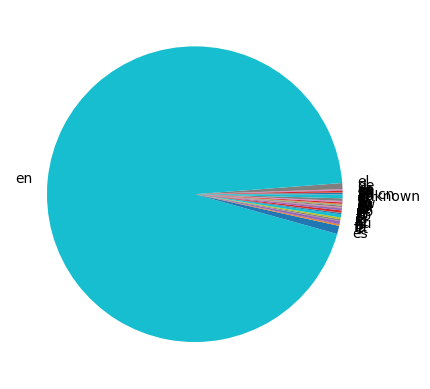

In [20]:
data.groupby('language').size().plot(kind='pie')

In [21]:
data_en = pd.DataFrame()
data_en['id']=data['id']
data_en['tags'] = data[data.language == 'en'].tags.copy() 
data_en['headline'] = data[data.language == 'en'].headline.copy()  
data_en['timestamp'] = data[data.language == 'en'].timestamp.copy() 

In [22]:
data_en

,id,tags,headline,timestamp
0,214440,NaN,NaN,NaT
1,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",RT @beniaminmincu: Simplest way to stake. Period.,2021-04-01 00:02:02+00:00
2,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",Qtum partners with Vaccine Forward to help sup...,2021-04-01 00:02:05+00:00
3,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",:chequered_flag: THE RALLY TOKEN SALE &amp; DI...,2021-04-01 00:03:04+00:00
4,454236,NaN,NaN,NaT
...,...,...,...,...
42722,246254,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @Coinight: :glowing_star: Zilliqa Has Annou...,2021-04-30 23:32:02+00:00
42723,246255,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",Ethereum Moves Toward ETH 2.0 With ‘Super Expe...,2021-04-30 23:33:09+00:00
42724,246256,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @WPeaster: 18th @BanklessHQ here! A week fo...,2021-04-30 23:38:03+00:00
42725,246257,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...",Great to have you @AtmPools @4TheWhiteRabbit a...,2021-04-30 23:42:05+00:00


In [23]:
data_en['headline'] = data_en['headline'].fillna('')

In [24]:
data_en.head()

,id,tags,headline,timestamp
0,214440,NaN,,NaT
1,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",RT @beniaminmincu: Simplest way to stake. Period.,2021-04-01 00:02:02+00:00
2,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",Qtum partners with Vaccine Forward to help sup...,2021-04-01 00:02:05+00:00
3,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",:chequered_flag: THE RALLY TOKEN SALE &amp; DI...,2021-04-01 00:03:04+00:00
4,454236,NaN,,NaT


In [25]:
data_en['headline_len'] = data_en.headline.apply(lambda x: len(x))
data_en['headline']

0                                                         
1        RT @beniaminmincu: Simplest way to stake. Period.
2        Qtum partners with Vaccine Forward to help sup...
3        :chequered_flag: THE RALLY TOKEN SALE &amp; DI...
4                                                         
                               ...                        
42722    RT @Coinight: :glowing_star: Zilliqa Has Annou...
42723    Ethereum Moves Toward ETH 2.0 With ‘Super Expe...
42724    RT @WPeaster: 18th @BanklessHQ here! A week fo...
42725    Great to have you @AtmPools @4TheWhiteRabbit a...
42726    Partnership announcement with https://t.co/fJX...
Name: headline, Length: 41663, dtype: object

In [26]:
data_en = data_en[data_en.headline_len!= 0]
data_en

,id,tags,headline,timestamp,headline_len
1,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",RT @beniaminmincu: Simplest way to stake. Period.,2021-04-01 00:02:02+00:00,49
2,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",Qtum partners with Vaccine Forward to help sup...,2021-04-01 00:02:05+00:00,140
3,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",:chequered_flag: THE RALLY TOKEN SALE &amp; DI...,2021-04-01 00:03:04+00:00,347
5,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",Thank you to the amazing projects helping ushe...,2021-04-01 00:07:41.414000+00:00,140
6,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...","For the orderbook market makers, we have those...",2021-04-01 00:07:41.470000+00:00,140
...,...,...,...,...,...
42722,246254,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @Coinight: :glowing_star: Zilliqa Has Annou...,2021-04-30 23:32:02+00:00,153
42723,246255,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",Ethereum Moves Toward ETH 2.0 With ‘Super Expe...,2021-04-30 23:33:09+00:00,63
42724,246256,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @WPeaster: 18th @BanklessHQ here! A week fo...,2021-04-30 23:38:03+00:00,140
42725,246257,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...",Great to have you @AtmPools @4TheWhiteRabbit a...,2021-04-30 23:42:05+00:00,304


In [27]:
data_en.index

Int64Index([    1,     2,     3,     5,     6,     7,     8,     9,    10,
               13,
            ...
            42716, 42717, 42718, 42719, 42721, 42722, 42723, 42724, 42725,
            42726],
           dtype='int64', length=39351)

In [28]:
data_en=data_en.reset_index(drop=True)

In [29]:
data_en

,id,tags,headline,timestamp,headline_len
0,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",RT @beniaminmincu: Simplest way to stake. Period.,2021-04-01 00:02:02+00:00,49
1,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",Qtum partners with Vaccine Forward to help sup...,2021-04-01 00:02:05+00:00,140
2,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",:chequered_flag: THE RALLY TOKEN SALE &amp; DI...,2021-04-01 00:03:04+00:00,347
3,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",Thank you to the amazing projects helping ushe...,2021-04-01 00:07:41.414000+00:00,140
4,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...","For the orderbook market makers, we have those...",2021-04-01 00:07:41.470000+00:00,140
...,...,...,...,...,...
39346,246254,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @Coinight: :glowing_star: Zilliqa Has Annou...,2021-04-30 23:32:02+00:00,153
39347,246255,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",Ethereum Moves Toward ETH 2.0 With ‘Super Expe...,2021-04-30 23:33:09+00:00,63
39348,246256,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @WPeaster: 18th @BanklessHQ here! A week fo...,2021-04-30 23:38:03+00:00,140
39349,246257,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...",Great to have you @AtmPools @4TheWhiteRabbit a...,2021-04-30 23:42:05+00:00,304


In [30]:
data_lem = pd.DataFrame()
data_lem['headline'] = data_en.headline.copy() 

In [31]:
len(data_en)

39351

Лемматизация, приведение к нижнему регистру

In [32]:
lemmatizer = WordNetLemmatizer()

In [33]:
data_en



,id,tags,headline,timestamp,headline_len
0,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",RT @beniaminmincu: Simplest way to stake. Period.,2021-04-01 00:02:02+00:00,49
1,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",Qtum partners with Vaccine Forward to help sup...,2021-04-01 00:02:05+00:00,140
2,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",:chequered_flag: THE RALLY TOKEN SALE &amp; DI...,2021-04-01 00:03:04+00:00,347
3,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",Thank you to the amazing projects helping ushe...,2021-04-01 00:07:41.414000+00:00,140
4,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...","For the orderbook market makers, we have those...",2021-04-01 00:07:41.470000+00:00,140
...,...,...,...,...,...
39346,246254,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @Coinight: :glowing_star: Zilliqa Has Annou...,2021-04-30 23:32:02+00:00,153
39347,246255,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",Ethereum Moves Toward ETH 2.0 With ‘Super Expe...,2021-04-30 23:33:09+00:00,63
39348,246256,"[{'coin': None, 'id': 187, 'name': 'Announceme...",RT @WPeaster: 18th @BanklessHQ here! A week fo...,2021-04-30 23:38:03+00:00,140
39349,246257,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...",Great to have you @AtmPools @4TheWhiteRabbit a...,2021-04-30 23:42:05+00:00,304


In [34]:
import re
import string

In [35]:
data_en['headline'] = data_en['headline'].str.replace('[^\w\s]','')
data_en['headline'] = data_en['headline'].str.replace('\d+', '')

<ipython-input-35-76aaf76552e3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_en['headline'] = data_en['headline'].str.replace('[^\w\s]','')
<ipython-input-35-76aaf76552e3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_en['headline'] = data_en['headline'].str.replace('\d+', '')


In [36]:
data_en['headline'].head()

0        RT beniaminmincu Simplest way to stake Period
1    Qtum partners with Vaccine Forward to help sup...
2    chequered_flag THE RALLY TOKEN SALE amp DISTRI...
3    Thank you to the amazing projects helping ushe...
4    For the orderbook market makers we have those ...
Name: headline, dtype: object

In [37]:
#data_en['headline']=data_en['headline'].str().lower()

In [38]:
for i in range(len(data_en['headline'])):
    #print(data_en['headline'][i])
    data_en['headline'][i]=lemmatizer.lemmatize(data_en['headline'][i].lower())

<ipython-input-38-15d3055521ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['headline'][i]=lemmatizer.lemmatize(data_en['headline'][i].lower())


In [39]:
data_en['headline'].head()

0        rt beniaminmincu simplest way to stake period
1    qtum partners with vaccine forward to help sup...
2    chequered_flag the rally token sale amp distri...
3    thank you to the amazing projects helping ushe...
4    for the orderbook market makers we have those ...
Name: headline, dtype: object

удаление знаков препинания и цифр

In [40]:
for i in range(len(data_en)):
    #data_en.headline[i] = re.sub(r'[^\w\s]', '', data_en.headline[i])
    data_en.headline[i] = re.sub(r'[\d]', '', data_en.headline[i])
data_en.head()

<ipython-input-40-f8f1c3c83537>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en.headline[i] = re.sub(r'[\d]', '', data_en.headline[i])


,id,tags,headline,timestamp,headline_len
0,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",rt beniaminmincu simplest way to stake period,2021-04-01 00:02:02+00:00,49
1,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",qtum partners with vaccine forward to help sup...,2021-04-01 00:02:05+00:00,140
2,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",chequered_flag the rally token sale amp distri...,2021-04-01 00:03:04+00:00,347
3,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",thank you to the amazing projects helping ushe...,2021-04-01 00:07:41.414000+00:00,140
4,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...",for the orderbook market makers we have those ...,2021-04-01 00:07:41.470000+00:00,140


Удаление стоп-слов и токенизация

In [41]:
from nltk.corpus import stopwords

In [42]:
for i in range(len(data_en)):
    temp_tokenize = []
    str_tokenize = ''
    temp_tokenize += nltk.word_tokenize(data_en.headline[i])
    for j in range(len(temp_tokenize)):
        if temp_tokenize[j] not in stopwords.words('english'):
            str_tokenize += temp_tokenize[j]
        if (j < len(temp_tokenize)):
            str_tokenize += ' '
    data_en.headline[i] = str_tokenize
data_en.head()

<ipython-input-42-ec55a75e3be3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en.headline[i] = str_tokenize


,id,tags,headline,timestamp,headline_len
0,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",rt beniaminmincu simplest way stake period,2021-04-01 00:02:02+00:00,49
1,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",qtum partners vaccine forward help support c...,2021-04-01 00:02:05+00:00,140
2,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",chequered_flag rally token sale amp distribut...,2021-04-01 00:03:04+00:00,347
3,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",thank amazing projects helping usher era ...,2021-04-01 00:07:41.414000+00:00,140
4,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...",orderbook market makers sweet rewards wh...,2021-04-01 00:07:41.470000+00:00,140


Стемминг

In [43]:
from nltk.stem.snowball import SnowballStemmer

In [44]:
sno = nltk.stem.SnowballStemmer('english')
sno.stem('grows')

'grow'

In [45]:
words=[]
words=data_en.headline[0].split(' ')

In [46]:
words[0]

'rt'

In [47]:
test_stemming = []
for i in range(len(data_en)): 
    words=data_en.headline[i].split(' ')
    new_str=''
    for j in range(len(words)):
      words[j]=sno.stem(words[j])
      new_str+=words[j]+' '
    #print(new_str)
    data_en.headline[i]=new_str

<ipython-input-47-78ed2e2f4f1f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en.headline[i]=new_str


In [48]:
data_en.head()

,id,tags,headline,timestamp,headline_len
0,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",rt beniaminmincu simplest way stake period,2021-04-01 00:02:02+00:00,49
1,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",qtum partner vaccin forward help support cov...,2021-04-01 00:02:05+00:00,140
2,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",chequered_flag ralli token sale amp distribut...,2021-04-01 00:03:04+00:00,347
3,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",thank amaz project help usher era ethere...,2021-04-01 00:07:41.414000+00:00,140
4,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...",orderbook market maker sweet reward whet...,2021-04-01 00:07:41.470000+00:00,140


In [49]:
data_en.headline

0            rt beniaminmincu simplest way  stake period  
1        qtum partner  vaccin forward  help support cov...
2        chequered_flag  ralli token sale amp distribut...
3        thank    amaz project help usher   era  ethere...
4          orderbook market maker    sweet reward  whet...
                               ...                        
39346    rt coinight glowing_star zilliqa  announc  new...
39347    ethereum move toward eth  super experiment tes...
39348    rt wpeaster th banklesshq   week   book  saw a...
39349    great    atmpool thewhiterabbit     first plut...
39350    partnership announc  httpstcofjxvcdhsuj  partn...
Name: headline, Length: 39351, dtype: object

In [50]:
data_count=data_en.groupby(data_en['timestamp'].dt.date).count()
data_count

,id,tags,headline,timestamp,headline_len
timestamp,,,,,
2021-04-01,1619,1619,1619,1619,1619
2021-04-02,1282,1282,1282,1282,1282
2021-04-03,541,541,541,541,541
2021-04-04,556,556,556,556,556
2021-04-05,1165,1165,1165,1165,1165
2021-04-06,1561,1561,1561,1561,1561
2021-04-07,1553,1553,1553,1553,1553
2021-04-08,1603,1603,1603,1603,1603
2021-04-09,1422,1422,1422,1422,1422


In [51]:
data_en.groupby(data_en['timestamp'].dt.date).count().sort_values(by='headline', ascending=True)

,id,tags,headline,timestamp,headline_len
timestamp,,,,,
2021-04-11,464,464,464,464,464
2021-04-18,521,521,521,521,521
2021-04-25,536,536,536,536,536
2021-04-03,541,541,541,541,541
2021-04-24,546,546,546,546,546
2021-04-10,549,549,549,549,549
2021-04-04,556,556,556,556,556
2021-04-17,598,598,598,598,598
2021-04-05,1165,1165,1165,1165,1165


Сохраняем обработанные данные

In [53]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
with open('/content/drive/MyDrive/pred_2021_04.pickle', 'wb') as f:
    pickle.dump(data_en, f, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
batch=data_en
batch.head()

,id,tags,headline,timestamp,headline_len
0,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",rt beniaminmincu simplest way stake period,2021-04-01 00:02:02+00:00,49
1,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",qtum partner vaccin forward help support cov...,2021-04-01 00:02:05+00:00,140
2,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",chequered_flag ralli token sale amp distribut...,2021-04-01 00:03:04+00:00,347
3,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",thank amaz project help usher era ethere...,2021-04-01 00:07:41.414000+00:00,140
4,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...",orderbook market maker sweet reward whet...,2021-04-01 00:07:41.470000+00:00,140


In [ ]:
obj

,id,tags,headline,timestamp,headline_len
0,214442,"[{'coin': {'name': 'Elrond', 'ticker': 'EGLD',...",rt beniaminmincu simplest way stake period,2021-04-01 00:02:02+00:00,49
1,214441,"[{'coin': None, 'id': 311, 'name': 'Partnershi...",qtum partner vaccin forward help support cov...,2021-04-01 00:02:05+00:00,140
2,214443,"[{'coin': None, 'id': 371, 'name': 'CoinList',...",chequered_flag ralli token sale amp distribut...,2021-04-01 00:03:04+00:00,347
3,454235,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",thank amaz project help usher era ethere...,2021-04-01 00:07:41.414000+00:00,140
4,454234,"[{'coin': {'name': 'Loopring', 'ticker': 'LRC'...",orderbook market maker sweet reward whet...,2021-04-01 00:07:41.470000+00:00,140
...,...,...,...,...,...
39346,246254,"[{'coin': None, 'id': 187, 'name': 'Announceme...",rt coinight glowing_star zilliqa announc new...,2021-04-30 23:32:02+00:00,153
39347,246255,"[{'coin': {'name': 'Ethereum', 'ticker': 'ETH'...",ethereum move toward eth super experiment tes...,2021-04-30 23:33:09+00:00,63
39348,246256,"[{'coin': None, 'id': 187, 'name': 'Announceme...",rt wpeaster th banklesshq week book saw a...,2021-04-30 23:38:03+00:00,140
39349,246257,"[{'coin': {'name': 'Cardano', 'ticker': 'ADA',...",great atmpool thewhiterabbit first plut...,2021-04-30 23:42:05+00:00,304


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.4 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer
import torch

In [ ]:
obj=data

In [ ]:
sentenses=obj.headline

In [ ]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
input_ids=[]
attention_mask=[]

for sent in sentenses:
  encoded_dict =tokenizer.encode_plus(sent, 
                                      add_special_tokens=True,
                                      max_length=64,
                                      pad_to_max_length=True,
                                      return_attention_mask=True,
                                      return_tensors='pt',
                                      )
  input_ids.append(encoded_dict['input_ids'])
  attention_mask.append(encoded_dict['attention_mask'])

In [ ]:
input_ids=torch.cat(input_ids)
attention_mask = torch.cat(attention_mask)


In [ ]:
input_ids.shape

In [ ]:
print(sentenses[0], '/', input_ids[0])

In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline('sentiment-analysis', model='bert-base-uncased')

In [ ]:
obj['tokenized_text']=obj['headline'].apply(lambda x: tokenizer(x, padding=True, truncation=True, return_tensors='pt'))

In [ ]:
obj['sentiment']=obj['headline'].apply(lambda x: classifier(x)[0]['label'])

In [ ]:
set(obj['headline'][24000:24100].apply(lambda x: classifier(x)[0]['label']))

FinBert

In [ ]:
obj

NameError: ignored

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from distutils.dir_util import copy_tree
from huggingface_hub import Repository, snapshot_download, create_repo, get_full_repo_name


def copy_repository_template():
    # Clone the repo and extract the local path
    template_repo_id = "lewtun/distilbert-base-uncased-finetuned-squad-d5716d28"
    commit_hash = "be3eaffc28669d7932492681cd5f3e8905e358b4"
    template_repo_dir = snapshot_download(template_repo_id, revision=commit_hash)
    # Create an empty repo on the Hub
    model_name = template_repo_id.split("/")[1]
    create_repo(model_name, exist_ok=True)
    # Clone the empty repo
    new_repo_id = get_full_repo_name(model_name)
    new_repo_dir = model_name
    repo = Repository(local_dir=new_repo_dir, clone_from=new_repo_id)
    # Copy files
    copy_tree(template_repo_dir, new_repo_dir)
    # Push to Hub
    repo.push_to_hub()

In [ ]:
obj=data

In [ ]:
model=AutoModelForSequenceClassification.from_pretrained("ipuneetrathore/bert-base-cased-finetuned-finBERT")

In [ ]:
batch=list(obj['headline'])

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ipuneetrathore/bert-base-cased-finetuned-finBERT")
encoded = tokenizer(batch, add_special_tokens=True, max_length=200,
                    padding='max_length',return_attention_mask=True,
                    return_tensors='pt', truncation=True)

In [ ]:
encoded

{'input_ids': tensor([[  101,   961, 28865,  ...,     0,     0,     0],
        [  101,   155,  1942,  ...,     0,     0,     0],
        [  101,   154,  8928,  ...,     0,     0,     0],
        ...,
        [  101,   155,  1942,  ...,     0,     0,     0],
        [  101,  2038,  1106,  ...,     0,     0,     0],
        [  101, 17330,  8679,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
input_ids = torch.cat([encoded['input_ids']], dim=0)
attention_mask = torch.cat([encoded['attention_mask']], dim=0)
token_type_ids = torch.cat([encoded['token_type_ids']], dim=0)

In [ ]:
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("ipuneetrathore/bert-base-cased-finetuned-finBERT")


In [ ]:
attention_mask

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
model_output = model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)

In [ ]:
logits = model_output[0]
softmax_output = F.softmax(logits, dim=1).detach().numpy()

In [ ]:
sentiment_score = softmax_output[:, 2] - softmax_output[:, 0]

In [ ]:
sentiment_score

array([ 3.81169320e-06, -1.77351876e-06,  3.03379366e-05,  9.50872163e-08,
        3.99767350e-06,  4.14176146e-04,  1.46461389e-06,  1.60844138e-09,
       -4.59372131e-07,  4.47384673e-06, -1.77351876e-06,  7.67514757e-06,
        2.31168451e-06,  4.37308518e-06,  1.69293457e-06, -4.07084826e-07,
        1.25569568e-06, -5.17529770e-08, -1.10575274e-06,  1.05699110e-06,
        4.94195547e-07, -9.20554839e-07, -8.28439397e-07, -8.05195441e-07,
       -5.17529770e-08,  1.25569568e-06, -8.05195441e-07,  1.41101555e-06,
       -9.20554839e-07, -1.90773244e-06, -1.75496098e-08,  6.91177775e-07,
        1.60502987e-06, -1.08579093e-06, -5.96694463e-07, -8.08108325e-07,
       -1.75042533e-06, -1.46955153e-06, -1.90846208e-06, -1.75042533e-06,
       -1.46955153e-06, -1.71379543e-06, -6.03939725e-07,  4.28921339e-07,
        1.11013815e-05,  3.20478989e-06,  2.46191121e-08, -2.73416617e-06,
        3.85997964e-06,  1.06374318e-06, -4.41736756e-06, -1.88815829e-06,
        8.33946615e-07, -

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scale_sentiment(sentiments):
    """ Scale sentiment scores from [-1...1] to [0...1] """
    mm = MinMaxScaler()
    sent_proc = np.array(sentiments).reshape(-1, 1)
    return mm.fit_transform(sent_proc)
scale_sentiment(sentiment_score[0])

array([[0.]], dtype=float32)

In [ ]:
float(sentiment_score[0])

3.811693204625044e-06

Timestamp

In [ ]:
data_tikers = pd.read_parquet('/content/drive/MyDrive/qset_77tickers_fut_20200101_20220601.parquet')
#data_tikers['timestamp'] = data_en.timestamp
data_tikers

In [ ]:
data_en['timestamp']

In [ ]:
data_en['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
data_en['timestamp'].head()

In [ ]:
data_tikers['timestamp'] = pd.to_datetime(data_tikers['startRange'])
data_tikers['timestamp'].head()

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data_tikers['timestamp'] = pd.to_datetime(data_tikers['startRange'])

In [ ]:
df = pd.concat(data, data_tikers)

In [ ]:
df

Нормализация сентиментов

In [ ]:
def weight_S(Si, S):
  return (Si - S.mean())/(np.linalg.norm(Si-S.mean(), ord=1)))